In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Definindo Função para Cálculo de Métricas

In [3]:
def calcular_metricas(VP, VN, FP, FN):
    # Sensibilidade (Recall)
    sensibilidade = VP / (VP + FN) if (VP + FN) != 0 else 0

    # Especificidade
    especificidade = VN / (FP + VN) if (FP + VN) != 0 else 0

    # Acurácia
    N = VP + VN + FP + FN
    acuracia = (VP + VN) / N if N != 0 else 0

    # Precisão
    precisao = VP / (VP + FP) if (VP + FP) != 0 else 0

    # F-Score
    f_score = (2 * precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) != 0 else 0

    return {
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Acurácia": acuracia,
        "Precisão": precisao,
        "F-Score": f_score
    }

In [4]:
matriz_confusao = np.array([
    [50, 5],  # [VP, FN]
    [10, 40]  # [FP, VN]
])

In [5]:
VP = matriz_confusao[0, 0]
FN = matriz_confusao[0, 1]
FP = matriz_confusao[1, 0]
VN = matriz_confusao[1, 1]


### Calculando e Exibindo dados fictícios

In [6]:
# Calcular as métricas
metricas = calcular_metricas(VP, VN, FP, FN)

# Exibir a matriz de confusão como tabela
df_matriz = pd.DataFrame(matriz_confusao, 
                         index=["Real Positivo", "Real Negativo"], 
                         columns=["Predito Positivo", "Predito Negativo"])
print("Matriz de Confusão:")
display(df_matriz)

# Exibir as métricas calculadas
print("\nMétricas de Avaliação:")
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.2f}")

Matriz de Confusão:


,Predito Positivo,Predito Negativo
Real Positivo,50,5
Real Negativo,10,40



Métricas de Avaliação:
Sensibilidade (Recall): 0.91
Especificidade: 0.80
Acurácia: 0.86
Precisão: 0.83
F-Score: 0.87


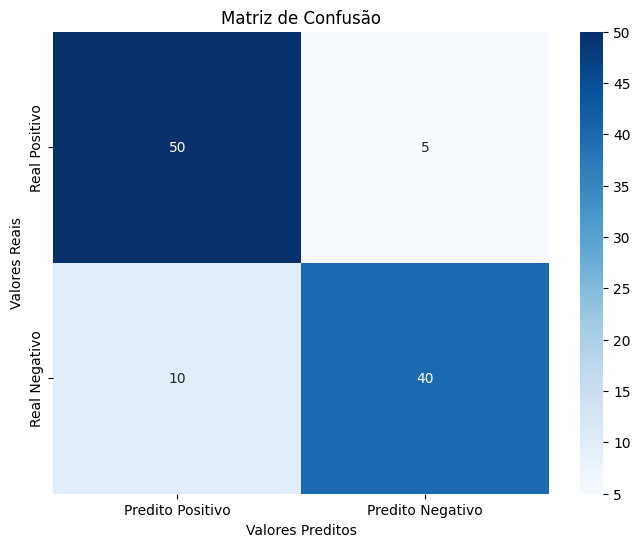

In [7]:
# Visualizar a matriz de confusão como gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(df_matriz, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.show()